# Decision Trees:

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. 

In [6]:
import pandas as pd
import mglearn
import matplotlib 
import pylab as plt
%matplotlib inline

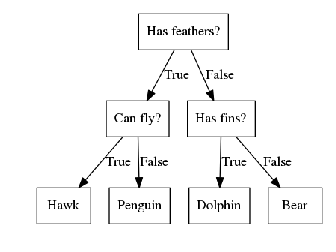

In [9]:
mglearn.plots.plot_animal_tree()

*Figure above shows a decision tree to distinguish among several animals*

In the illustration above, each node in the tree either represents a question or a terminal node (also called a leaf) that contains the answer. The edges connecct the answers to a question with the next question you would ask. 